In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Sigmoid Neuron Class

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
class SigmoidNeuron:
  def __init__(self): 
    self.w=None
    self.b=None
  
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x)) 

  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x

  def grad_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)

  def fit(self, X, Y, epochs = 1, lr = 1, initialise = True, display_loss=False):
    if initialise:
      self.w = np.random.randn(1,X.shape[1])
      self.b = 0

    if(display_loss):
      loss={}
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw+=self.grad_w(x,y) 
        db+=self.grad_b(x,y)
      self.w -= lr*dw 
      self.b -= lr*db

      if(display_loss):
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)

    if display_loss:
      plt.plot(loss.values())
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error") # The accuracy metric for sigmoid neuron
      plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Load Data

In [6]:
!ls

sample_data


In [0]:
data = pd.read_csv('mobile_cleaned.csv')

In [10]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [11]:
data.shape

(341, 88)

In [0]:
X = data.drop('Rating', axis = 1)

In [0]:
Y = data['Rating']

In [14]:
print(X.head(), Y.head())

   PhoneId  Pixel Density  Screen Size  ...  Sim1_2G  Sim1_3G  Sim1_4G
0        0            403         6.26  ...        0        0        1
1        1            271         6.20  ...        0        0        1
2        2            409         6.30  ...        0        0        1
3        4            411         6.00  ...        0        0        1
4        5            396         6.50  ...        0        0        1

[5 rows x 87 columns] 0    4.5
1    4.5
2    4.4
3    4.3
4    4.4
Name: Rating, dtype: float64


In [15]:
Y = Y.values
print(Y)

[4.5 4.5 4.4 4.3 4.4 4.5 4.3 4.1 4.3 4.5 4.5 4.  4.4 4.4 4.4 4.4 4.5 4.4
 4.4 4.4 4.4 4.5 4.4 4.3 4.2 4.3 4.3 4.6 4.4 4.5 3.9 4.2 4.3 4.2 4.3 4.3
 4.2 4.4 4.1 3.8 4.4 4.6 4.3 4.5 4.5 4.2 3.9 4.3 4.  4.3 4.3 3.9 4.2 4.5
 4.  4.6 4.2 2.8 4.4 4.3 4.2 4.4 4.4 4.  4.4 4.4 4.1 4.5 4.3 3.9 4.3 4.1
 4.1 4.2 3.4 4.2 4.6 3.8 4.3 4.5 4.2 4.5 4.5 4.  4.1 4.4 4.5 4.1 4.5 4.3
 4.5 3.9 3.9 4.4 4.4 4.4 4.  4.1 4.1 4.4 4.3 4.3 4.2 4.3 3.4 4.3 4.3 4.2
 4.6 4.8 4.4 3.4 3.7 4.2 4.3 4.4 4.3 4.2 4.1 4.3 4.  3.9 4.4 4.4 3.9 3.1
 3.7 4.2 4.4 4.  4.  4.1 4.2 4.3 4.2 4.3 4.1 3.6 4.1 4.  3.8 3.7 4.3 4.1
 4.1 4.5 4.  4.3 3.6 4.1 4.5 3.5 4.  4.3 4.6 3.5 3.9 4.1 3.9 3.8 4.4 4.3
 4.  3.9 4.4 4.7 3.9 4.5 3.7 4.  4.3 4.1 4.8 4.1 4.  4.7 4.  4.1 4.  3.4
 4.1 3.9 3.1 4.1 3.7 3.4 3.9 4.3 4.1 3.7 3.8 4.  3.8 4.6 3.4 3.3 3.2 3.5
 4.3 4.1 4.  3.8 4.3 4.1 4.  3.8 3.8 3.9 4.1 3.7 4.2 4.  4.2 4.4 4.1 3.4
 4.2 4.4 3.9 3.9 4.4 4.2 4.5 4.5 4.2 4.  4.2 3.5 3.7 4.3 5.  3.5 4.4 3.7
 4.3 3.9 4.3 3.8 3.8 4.3 5.  4.1 3.  4.4 3.  4.  4.

# Preprocessing

## Binarise

In [0]:
threshold = 4
data['Class'] = (data['Rating']>=threshold).astype(np.int) # Adding a new column for binary values

In [17]:
data['Class']

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    1
339    0
340    1
Name: Class, Length: 341, dtype: int64

In [18]:
print(data['Class'].value_counts)
print(data['Class'].value_counts(normalize=True))

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    1
339    0
340    1
Name: Class, Length: 341, dtype: int64>
1    0.697947
0    0.302053
Name: Class, dtype: float64


### Skewed, so change threshold for fair number of points on both sides.

In [19]:
threshold = 4.2
data['Class'] = (data['Rating']>=threshold).astype(np.int)
print(data['Class'].value_counts)
print(data['Class'].value_counts(normalize=True)) # "normalize" to express as percentage


<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    0
339    0
340    1
Name: Class, Length: 341, dtype: int64>
0    0.533724
1    0.466276
Name: Class, dtype: float64


### Now, almost equal number of points on both sides

In [0]:
Y_binarised = data['Class'].values

## Standardisation

In [0]:
# from sklearn.preprocessing import StandardScaler # (imported above)

In [0]:
# Trial
R = np.random.random((100,1))

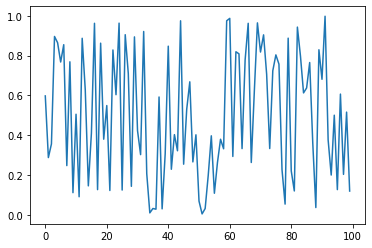

In [23]:
plt.plot(R)
plt.show()

In [24]:
print(np.mean(R), np.std(R))

0.49790454113737714 0.31315526992297793


### Not standardised, mean = 0.5, standard deviation is not 1. Data varies between 0 and 15

In [25]:
# Now standardize
scaler = StandardScaler() # Create a model of Standard scaler
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
scaler.mean_ # Exactly same as what we got above

array([0.49790454])

## Train-test split

In [0]:
# from sklearn.model_selection import train_test_split # (imported above)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, stratify = Y_binarised)
# random_state ensures reproducibility
# stratify based on Y_binarised (categorical) not Y (real).
# First split and then standardise

In [29]:
print(X_train.shape, X_test.shape) # Use print in Jupyter whenever you want to print more than one output

(255, 87) (86, 87)


In [0]:
scaler = StandardScaler()

In [0]:
# Standardise input features
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [0]:
#Binarise output. NOT standardise else will be completely changing output

In [0]:
# from sklearn.preprocessing import MinMaxScaler # (imported above)

In [0]:
minmax_scaler = MinMaxScaler()

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [38]:
np.max(Y_scaled_train)

1.0

In [39]:
np.min(Y_scaled_train)

0.0

In [0]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [0]:
# Now find binarised output for scaled output features
# Compute new threshold
scaled_threshold = minmax_scaler.transform(np.array([threshold]).reshape(-1,1))

In [0]:
Y_binarised_train = (Y_scaled_train>scaled_threshold).astype("int").ravel()

In [0]:
Y_binarised_test = (Y_scaled_test>scaled_threshold).astype("int").ravel()

# Train and Test on real data

In [0]:
# from sklearn.metrics import accuracy_score # (imported above)

In [0]:
sn = SigmoidNeuron()

In [0]:
# Train on real data
sn.fit(X_scaled_train, Y_scaled_train)

In [0]:
# Test/Predict on real data
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
# Convert predicted values to binary, for ease of comparing accuracy
Y_pred_binarised_train = (Y_pred_train>scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test>scaled_threshold).astype("int").ravel()

In [0]:
# Compute accuracy of predicted values using binarised values
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [58]:
print(accuracy_train, accuracy_test)

0.7137254901960784 0.7441860465116279


In [69]:
# Try different values of epochs and learning rates

for i,j in [(1000, 0.01),(2000, 0.015),(5000, 0.05)]:
  sn.fit(X_scaled_train, Y_scaled_train, epochs=i, lr = j)
  Y_pred_train = sn.predict(X_scaled_train)
  Y_pred_test = sn.predict(X_scaled_test)
  Y_pred_binarised_train = (Y_pred_train>scaled_threshold).astype("int").ravel()
  Y_pred_binarised_test = (Y_pred_test>scaled_threshold).astype("int").ravel()
  accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
  accuracy_test = accuracy_score(Y_pred_binarised_test, Y_binarised_test)
  print(accuracy_train, accuracy_test)

0.7215686274509804 0.686046511627907
0.7450980392156863 0.8372093023255814
0.6509803921568628 0.7093023255813954


<big>
1. First one has too less epochs
2. Second one has the right number of epochs and learning rate
3. Third one has too large a learning rate 
</big>

In [0]:
# Plot the loss vs epochs
# TODO: (NOT working)
# Check the plotting part of fit function of Sigmoid Neuron

sn.fit(X_scaled_train, Y_scaled_train, epochs=100, lr = 0.015, display_loss = True)